In [9]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing

# Constants to easily update and read the code
DATA_DIR = "../data/"
MOVIE_DATASET = "movie_data_2015_2020.csv"
START_YEAR = 2015
END_YEAR = 2020
YEARS = range(START_YEAR, END_YEAR + 1)

# Auxiliary functions
def quotes_dataset(year):
    return f'quotes-{year}.json.bz2'

def output_dataset(year):
    return f"movie_{year}_test.csv"

def filteroutQuotes(dataframe):
    return(dataframe[dataframe["quotation"].str.lower().str.contains("la la land")])

In [10]:
def handleYear(year):
    # We read the dataset by chunks because it is too big
    # Warning: it takes a long time
    with pd.read_json(DATA_DIR + quotes_dataset(year), lines=True, chunksize=10000) as df_reader:

        # Concatenate the quotes whose speaker are in the movie dataset
        quotes = pd.DataFrame()
        # Use tqdm to display a progress bar (it takes a long time)
        pbar = tqdm(df_reader)
        for chunk in pbar:
            ft = filteroutQuotes(chunk)
            quotes = pd.concat((quotes,ft))
            pbar.set_description(f"({year}) Number of quotes extracted = {quotes.shape[0]}")
            quotes.to_csv(DATA_DIR + output_dataset(year))

    print(f"Year {year}: {quotes.shape[0]} quotes extracted")
    #quotes.head()
    
    # Save to the data folder
    
    #quotes.to_csv(DATA_DIR + output_dataset(year), compression='gzip')

In [11]:
handleYear("2016")

(2016) Number of quotes extracted = 167: : 1387it [11:11,  2.07it/s]

Year 2016: 167 quotes extracted


In [94]:
df = pd.read_csv(DATA_DIR + output_dataset("2016"))

In [95]:
df["date"] = pd.to_datetime(df["date"])

In [96]:
df_total = df

In [97]:
df_total = df[(df['date'] > '2016-11-25') & (df['date'] < '2016-12-23')]

In [98]:
df_total

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
1,335253,2016-12-16-055269,It was only after (Damien's Oscar nominated 20...,Emma Stone,"['Q147077', 'Q58064847']",2016-12-16 14:06:44,2,"[['Emma Stone', '0.859'], ['Ryan Gosling', '0....",['http://tv3.ie/entertainment_article.php?locI...,E
5,680292,2016-12-13-071838,"Look, everyone is praising `La La Land' and it...",Damien Chazelle,['Q18350026'],2016-12-13 03:51:35,1,"[['Damien Chazelle', '0.5454'], ['None', '0.23...",['http://fox5sandiego.com/2016/12/12/the-criti...,E
9,935297,2016-12-11-013711,He venerates and celebrates bygone methods and...,Richard Brody,['Q19539028'],2016-12-11 00:05:00,2,"[['Richard Brody', '0.8558'], ['Damien Chazell...",['http://www.latimes.com/entertainment/movies/...,E
12,1247128,2016-12-18-015824,I am not stupid enough to think it will all wo...,Michelle Carr,['Q47991070'],2016-12-18 16:12:19,1,"[['Michelle Carr', '0.6082'], ['None', '0.3918']]",['http://www.rrstar.com/news/20161218/georgett...,E
13,1312092,2016-12-12-091430,"There's nothing cynical about La La Land, and ...",None,[],2016-12-12 13:01:00,1,"[['None', '0.4632'], ['Vlad the Impaler', '0.3...",['http://gq.com/story/ryan-gosling-profile'],E
...,...,...,...,...,...,...,...,...,...,...
161,13442204,2016-12-19-101795,What makes LA LA LAND such an astonishing cine...,Michael Haffner,['Q27050894'],2016-12-19 00:00:00,1,"[['Michael Haffner', '0.5809'], ['None', '0.41...",['http://www.wearemoviegeeks.com/2016/12/wamg-...,E
162,13486652,2016-12-13-072468,Making `La La Land' was a dream come true and ...,Fred Berger,"['Q28531045', 'Q5494615']",2016-12-13 00:08:54,2,"[['Fred Berger', '0.5965'], ['Jordan Horowitz'...",['http://www.stabroeknews.com/2016/entertainme...,E
163,13537985,2016-12-16-013752,CAN `LA LA LAND' MAKE THE MUSICAL MATTER AGAIN?,Chance The Rapper,['Q12470060'],2016-12-16 00:00:00,8,"[['Chance The Rapper', '0.695'], ['None', '0.3...",['http://guelphmercury.com/whatson-story/70241...,E
164,13572786,2016-12-07-040016,I guess I relate to that in the sense that it ...,Ryan Gosling,['Q193815'],2016-12-07 00:00:00,18,"[['Ryan Gosling', '0.5307'], ['Emma Stone', '0...",['http://bramptonguardian.com/whatson-story/70...,E


In [99]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import glob
import os
import re

import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import re
import datetime
from afinn import Afinn
tqdm.pandas()

import seaborn as sn

In [100]:
afn = Afinn()

nlp = en_core_web_sm.load()

punctuations = string.punctuation
#stopwords = list(STOP_WORDS)

parser = nlp
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in punctuations ]
    tokens = " ".join([i for i in tokens])
    return tokens

def count_words(s):
    return len(s.split())

def sentiment(s):
    return afn.score(s)

In [101]:

df_total["text_clean"] = df_total["quotation"].apply(spacy_tokenizer)

df_total["text"] = df_total["text_clean"].astype('str')

df_total

/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_25545/3562441345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["text_clean"] = df_total["quotation"].apply(spacy_tokenizer)
/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_25545/3562441345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["text"] = df_total["text_clean"].astype('str')


,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,text_clean,text
1,335253,2016-12-16-055269,It was only after (Damien's Oscar nominated 20...,Emma Stone,"['Q147077', 'Q58064847']",2016-12-16 14:06:44,2,"[['Emma Stone', '0.859'], ['Ryan Gosling', '0....",['http://tv3.ie/entertainment_article.php?locI...,E,it be only after damien 's oscar nominate 2014...,it be only after damien 's oscar nominate 2014...
5,680292,2016-12-13-071838,"Look, everyone is praising `La La Land' and it...",Damien Chazelle,['Q18350026'],2016-12-13 03:51:35,1,"[['Damien Chazelle', '0.5454'], ['None', '0.23...",['http://fox5sandiego.com/2016/12/12/the-criti...,E,look everyone be praise la la land and it be g...,look everyone be praise la la land and it be g...
9,935297,2016-12-11-013711,He venerates and celebrates bygone methods and...,Richard Brody,['Q19539028'],2016-12-11 00:05:00,2,"[['Richard Brody', '0.8558'], ['Damien Chazell...",['http://www.latimes.com/entertainment/movies/...,E,he venerate and celebrate bygone method and ma...,he venerate and celebrate bygone method and ma...
12,1247128,2016-12-18-015824,I am not stupid enough to think it will all wo...,Michelle Carr,['Q47991070'],2016-12-18 16:12:19,1,"[['Michelle Carr', '0.6082'], ['None', '0.3918']]",['http://www.rrstar.com/news/20161218/georgett...,E,i be not stupid enough to think it will all wo...,i be not stupid enough to think it will all wo...
13,1312092,2016-12-12-091430,"There's nothing cynical about La La Land, and ...",None,[],2016-12-12 13:01:00,1,"[['None', '0.4632'], ['Vlad the Impaler', '0.3...",['http://gq.com/story/ryan-gosling-profile'],E,there be nothing cynical about la la land and ...,there be nothing cynical about la la land and ...
...,...,...,...,...,...,...,...,...,...,...,...,...
161,13442204,2016-12-19-101795,What makes LA LA LAND such an astonishing cine...,Michael Haffner,['Q27050894'],2016-12-19 00:00:00,1,"[['Michael Haffner', '0.5809'], ['None', '0.41...",['http://www.wearemoviegeeks.com/2016/12/wamg-...,E,what make la la land such an astonishing cinem...,what make la la land such an astonishing cinem...
162,13486652,2016-12-13-072468,Making `La La Land' was a dream come true and ...,Fred Berger,"['Q28531045', 'Q5494615']",2016-12-13 00:08:54,2,"[['Fred Berger', '0.5965'], ['Jordan Horowitz'...",['http://www.stabroeknews.com/2016/entertainme...,E,make la la land be a dream come true and we be...,make la la land be a dream come true and we be...
163,13537985,2016-12-16-013752,CAN `LA LA LAND' MAKE THE MUSICAL MATTER AGAIN?,Chance The Rapper,['Q12470060'],2016-12-16 00:00:00,8,"[['Chance The Rapper', '0.695'], ['None', '0.3...",['http://guelphmercury.com/whatson-story/70241...,E,can la la land make the musical matter again,can la la land make the musical matter again
164,13572786,2016-12-07-040016,I guess I relate to that in the sense that it ...,Ryan Gosling,['Q193815'],2016-12-07 00:00:00,18,"[['Ryan Gosling', '0.5307'], ['Emma Stone', '0...",['http://bramptonguardian.com/whatson-story/70...,E,i guess i relate to that in the sense that it ...,i guess i relate to that in the sense that it ...


In [102]:
df_total["sentiment"] = df_total["text"].apply(sentiment)
df_total["word_counts"] = df_total["text"].apply(count_words)

/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_25545/403524825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["sentiment"] = df_total["text"].apply(sentiment)
/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_25545/403524825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["word_counts"] = df_total["text"].apply(count_words)


In [103]:
df_total

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,text_clean,text,sentiment,word_counts
1,335253,2016-12-16-055269,It was only after (Damien's Oscar nominated 20...,Emma Stone,"['Q147077', 'Q58064847']",2016-12-16 14:06:44,2,"[['Emma Stone', '0.859'], ['Ryan Gosling', '0....",['http://tv3.ie/entertainment_article.php?locI...,E,it be only after damien 's oscar nominate 2014...,it be only after damien 's oscar nominate 2014...,0.0,46
5,680292,2016-12-13-071838,"Look, everyone is praising `La La Land' and it...",Damien Chazelle,['Q18350026'],2016-12-13 03:51:35,1,"[['Damien Chazelle', '0.5454'], ['None', '0.23...",['http://fox5sandiego.com/2016/12/12/the-criti...,E,look everyone be praise la la land and it be g...,look everyone be praise la la land and it be g...,6.0,15
9,935297,2016-12-11-013711,He venerates and celebrates bygone methods and...,Richard Brody,['Q19539028'],2016-12-11 00:05:00,2,"[['Richard Brody', '0.8558'], ['Damien Chazell...",['http://www.latimes.com/entertainment/movies/...,E,he venerate and celebrate bygone method and ma...,he venerate and celebrate bygone method and ma...,8.0,63
12,1247128,2016-12-18-015824,I am not stupid enough to think it will all wo...,Michelle Carr,['Q47991070'],2016-12-18 16:12:19,1,"[['Michelle Carr', '0.6082'], ['None', '0.3918']]",['http://www.rrstar.com/news/20161218/georgett...,E,i be not stupid enough to think it will all wo...,i be not stupid enough to think it will all wo...,-2.0,20
13,1312092,2016-12-12-091430,"There's nothing cynical about La La Land, and ...",None,[],2016-12-12 13:01:00,1,"[['None', '0.4632'], ['Vlad the Impaler', '0.3...",['http://gq.com/story/ryan-gosling-profile'],E,there be nothing cynical about la la land and ...,there be nothing cynical about la la land and ...,-5.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,13442204,2016-12-19-101795,What makes LA LA LAND such an astonishing cine...,Michael Haffner,['Q27050894'],2016-12-19 00:00:00,1,"[['Michael Haffner', '0.5809'], ['None', '0.41...",['http://www.wearemoviegeeks.com/2016/12/wamg-...,E,what make la la land such an astonishing cinem...,what make la la land such an astonishing cinem...,7.0,39
162,13486652,2016-12-13-072468,Making `La La Land' was a dream come true and ...,Fred Berger,"['Q28531045', 'Q5494615']",2016-12-13 00:08:54,2,"[['Fred Berger', '0.5965'], ['Jordan Horowitz'...",['http://www.stabroeknews.com/2016/entertainme...,E,make la la land be a dream come true and we be...,make la la land be a dream come true and we be...,4.0,21
163,13537985,2016-12-16-013752,CAN `LA LA LAND' MAKE THE MUSICAL MATTER AGAIN?,Chance The Rapper,['Q12470060'],2016-12-16 00:00:00,8,"[['Chance The Rapper', '0.695'], ['None', '0.3...",['http://guelphmercury.com/whatson-story/70241...,E,can la la land make the musical matter again,can la la land make the musical matter again,1.0,9
164,13572786,2016-12-07-040016,I guess I relate to that in the sense that it ...,Ryan Gosling,['Q193815'],2016-12-07 00:00:00,18,"[['Ryan Gosling', '0.5307'], ['Emma Stone', '0...",['http://bramptonguardian.com/whatson-story/70...,E,i guess i relate to that in the sense that it ...,i guess i relate to that in the sense that it ...,7.0,67


<AxesSubplot:ylabel='Count'>

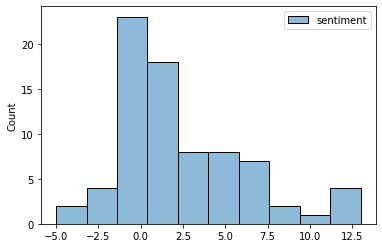

In [104]:
sn.histplot(df_total[["date","sentiment"]])

<AxesSubplot:xlabel='date', ylabel='sentiment'>

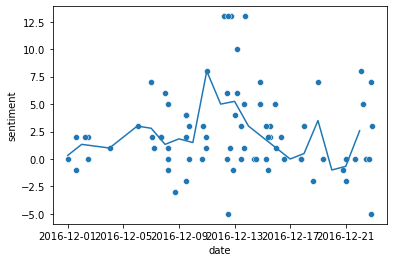

In [108]:
df_mean = df_total.groupby(df_total["date"].dt.floor('d')).mean().reset_index()
sn.scatterplot(data=df_total,x="date",y="sentiment")
sn.lineplot(data=df_mean,x="date",y="sentiment")